In [401]:
#Preliminaries

from __future__ import absolute_import, division, print_function  # Python 2/3 compatibility

import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns

%matplotlib inline

In [402]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [506]:
df1 = pd.read_csv('/home/satyam/distribution_new.csv')
print(df1.shape)
df1.head(5)

(1273, 4)


,ONE,TWO,THREE,TARGET
0,1,2.1282,5.8809,0
1,0,2.9293,1.1067,0
2,2,2.5568,0.8797,1
3,2,2.9293,1.1067,0
4,-2,0.0000,0.7009,0


In [507]:
df2 = pd.read_csv("/home/satyam/membrane_sequence1.csv")
df2.head()

,ONE,TWO,THREE
0,2,1.0986,1.2152
1,2,0.2231,0.7251
2,2,0.8101,1.2500
3,2,2.4159,1.2629
4,0,0.0000,0.7053


In [624]:
X = df1.iloc[:, :-1].values
y = df1["TARGET"].values

In [625]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11111)

In [943]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [944]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1018, 3)
(255, 3)
(1018, 2)
(255, 2)


In [945]:
x1 = df2.iloc[:,0:224].values

In [946]:
# np.mean(y), np.mean(1-y)

In [947]:
# rf_model = RandomForestClassifier(n_estimators=200)
# rf_model.fit(X_train, y_train)

In [948]:
# y_pred_class_rf = rf_model.predict(X_test)
# y_pred_prob_rf = rf_model.predict_proba(X_test)


# print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
# print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

In [949]:
# def plot_roc(y_test, y_pred, model_name):
#     fpr, tpr, thr = roc_curve(y_test, y_pred)
#     fig, ax = plt.subplots(figsize=(8, 8))
#     ax.plot(fpr, tpr, 'k-')
#     ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
#     ax.grid(True)
#     ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
#            xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


# plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

In [950]:
## First let's normalize the data
## This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing matrix multiplications
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [951]:
## First let's normalize the data
## This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing matrix multiplications
# normalizer1 = StandardScaler()
# X_test_norm1 = normalizer.transform(X_test)

In [1199]:
# Define the Model 
# Input size is 3-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_1 = Sequential([
    Dense(64, input_shape=(3,), activation="relu"),
    Dense(64, activation="relu"),
    Dense(2, activation="softmax")
])

In [1200]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            (None, 64)                256       
_________________________________________________________________
dense_213 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_214 (Dense)            (None, 2)                 130       
Total params: 4,546
Trainable params: 4,546
Non-trainable params: 0
_________________________________________________________________


In [1201]:
# checkpoint_path = "/home/satyam/training_mutation/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
#                                                 save_weights_only = True,
#                                                 verbose=1)

In [1202]:
from keras.models import load_model
model_1.save("nn1.h5")
#loaded_model = load_model("network.h5")
#loss, accuracy = loaded_model.evaluate(test_data, test_targets)

In [1256]:
# Fit(Train) the Model
from keras import optimizers
# Compile the model with Optimizer, Loss Function and Metrics
# Roc-Auc is not available in Keras as an off the shelf metric yet, so we will skip it here.
adam = optimizers.Adam(lr = 0.001)
model_1.compile(optimizer = adam, loss='categorical_crossentropy', metrics=['accuracy']) 
#model_1.compile(SGD(lr = 0.001), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=300)
# the fit function returns the run history. 
# It is very convenient, as it contains information about the model fit, iterations etc.

Train on 1018 samples, validate on 255 samples
Epoch 1/300
1018/1018 [==============================] - 2s 2ms/step - loss: 0.3770 - acc: 0.8418 - val_loss: 0.5532 - val_acc: 0.8275
Epoch 2/300
1018/1018 [==============================] - 0s 56us/step - loss: 0.3707 - acc: 0.8438 - val_loss: 0.5473 - val_acc: 0.8196
Epoch 3/300
1018/1018 [==============================] - 0s 55us/step - loss: 0.3702 - acc: 0.8448 - val_loss: 0.5396 - val_acc: 0.8235
Epoch 4/300
1018/1018 [==============================] - 0s 44us/step - loss: 0.3711 - acc: 0.8399 - val_loss: 0.5516 - val_acc: 0.8275
Epoch 5/300
1018/1018 [==============================] - 0s 43us/step - loss: 0.3704 - acc: 0.8418 - val_loss: 0.5367 - val_acc: 0.8196
Epoch 6/300
1018/1018 [==============================] - 0s 56us/step - loss: 0.3714 - acc: 0.8468 - val_loss: 0.5452 - val_acc: 0.8353
Epoch 7/300
1018/1018 [==============================] - 0s 46us/step - loss: 0.3718 - acc: 0.8428 - val_loss: 0.5487 - val_acc: 0.8314
Ep

1018/1018 [==============================] - 0s 80us/step - loss: 0.3711 - acc: 0.8409 - val_loss: 0.5472 - val_acc: 0.8196
Epoch 61/300
1018/1018 [==============================] - 0s 45us/step - loss: 0.3713 - acc: 0.8389 - val_loss: 0.5473 - val_acc: 0.8314
Epoch 62/300
1018/1018 [==============================] - 0s 42us/step - loss: 0.3696 - acc: 0.8369 - val_loss: 0.5510 - val_acc: 0.8314
Epoch 63/300
1018/1018 [==============================] - 0s 41us/step - loss: 0.3714 - acc: 0.8428 - val_loss: 0.5443 - val_acc: 0.8235
Epoch 64/300
1018/1018 [==============================] - 0s 63us/step - loss: 0.3692 - acc: 0.8418 - val_loss: 0.5381 - val_acc: 0.8353
Epoch 65/300
1018/1018 [==============================] - 0s 83us/step - loss: 0.3693 - acc: 0.8428 - val_loss: 0.5482 - val_acc: 0.8275
Epoch 66/300
1018/1018 [==============================] - 0s 81us/step - loss: 0.3704 - acc: 0.8379 - val_loss: 0.5519 - val_acc: 0.8275
Epoch 67/300
1018/1018 [==============================

Epoch 120/300
1018/1018 [==============================] - 0s 35us/step - loss: 0.3701 - acc: 0.8428 - val_loss: 0.5549 - val_acc: 0.8235
Epoch 121/300
1018/1018 [==============================] - 0s 43us/step - loss: 0.3712 - acc: 0.8418 - val_loss: 0.5576 - val_acc: 0.8314
Epoch 122/300
1018/1018 [==============================] - 0s 58us/step - loss: 0.3680 - acc: 0.8428 - val_loss: 0.5427 - val_acc: 0.8235
Epoch 123/300
1018/1018 [==============================] - 0s 95us/step - loss: 0.3701 - acc: 0.8428 - val_loss: 0.5437 - val_acc: 0.8275
Epoch 124/300
1018/1018 [==============================] - 0s 77us/step - loss: 0.3699 - acc: 0.8409 - val_loss: 0.5477 - val_acc: 0.8275
Epoch 125/300
1018/1018 [==============================] - 0s 71us/step - loss: 0.3718 - acc: 0.8409 - val_loss: 0.5596 - val_acc: 0.8392
Epoch 126/300
1018/1018 [==============================] - 0s 63us/step - loss: 0.3681 - acc: 0.8428 - val_loss: 0.5501 - val_acc: 0.8353
Epoch 127/300
1018/1018 [=========

1018/1018 [==============================] - 0s 32us/step - loss: 0.3706 - acc: 0.8399 - val_loss: 0.5557 - val_acc: 0.8314
Epoch 180/300
1018/1018 [==============================] - 0s 32us/step - loss: 0.3676 - acc: 0.8369 - val_loss: 0.5569 - val_acc: 0.8353
Epoch 181/300
1018/1018 [==============================] - 0s 32us/step - loss: 0.3665 - acc: 0.8448 - val_loss: 0.5660 - val_acc: 0.8392
Epoch 182/300
1018/1018 [==============================] - 0s 32us/step - loss: 0.3724 - acc: 0.8418 - val_loss: 0.5490 - val_acc: 0.8196
Epoch 183/300
1018/1018 [==============================] - 0s 34us/step - loss: 0.3725 - acc: 0.8409 - val_loss: 0.5563 - val_acc: 0.8275
Epoch 184/300
1018/1018 [==============================] - 0s 33us/step - loss: 0.3680 - acc: 0.8409 - val_loss: 0.5616 - val_acc: 0.8353
Epoch 185/300
1018/1018 [==============================] - 0s 32us/step - loss: 0.3685 - acc: 0.8409 - val_loss: 0.5633 - val_acc: 0.8275
Epoch 186/300
1018/1018 [=======================

1018/1018 [==============================] - 0s 33us/step - loss: 0.3713 - acc: 0.8438 - val_loss: 0.5661 - val_acc: 0.8353
Epoch 239/300
1018/1018 [==============================] - 0s 33us/step - loss: 0.3669 - acc: 0.8428 - val_loss: 0.5599 - val_acc: 0.8196
Epoch 240/300
1018/1018 [==============================] - 0s 33us/step - loss: 0.3664 - acc: 0.8428 - val_loss: 0.5643 - val_acc: 0.8275
Epoch 241/300
1018/1018 [==============================] - 0s 34us/step - loss: 0.3680 - acc: 0.8428 - val_loss: 0.5618 - val_acc: 0.8392
Epoch 242/300
1018/1018 [==============================] - 0s 33us/step - loss: 0.3674 - acc: 0.8438 - val_loss: 0.5675 - val_acc: 0.8314
Epoch 243/300
1018/1018 [==============================] - 0s 33us/step - loss: 0.3673 - acc: 0.8399 - val_loss: 0.5729 - val_acc: 0.8392
Epoch 244/300
1018/1018 [==============================] - 0s 32us/step - loss: 0.3710 - acc: 0.8438 - val_loss: 0.5600 - val_acc: 0.8235
Epoch 245/300
1018/1018 [=======================

1018/1018 [==============================] - 0s 34us/step - loss: 0.3705 - acc: 0.8418 - val_loss: 0.5660 - val_acc: 0.8314
Epoch 298/300
1018/1018 [==============================] - 0s 33us/step - loss: 0.3710 - acc: 0.8438 - val_loss: 0.5733 - val_acc: 0.8314
Epoch 299/300
1018/1018 [==============================] - 0s 34us/step - loss: 0.3698 - acc: 0.8409 - val_loss: 0.5665 - val_acc: 0.8157
Epoch 300/300
1018/1018 [==============================] - 0s 68us/step - loss: 0.3688 - acc: 0.8389 - val_loss: 0.5649 - val_acc: 0.8353


In [1257]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

In [1273]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:256]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1259]:
y_pred_prob_nn_1[:10]

array([[7.7492207e-01, 2.2507793e-01],
       [8.6448908e-01, 1.3551092e-01],
       [9.6441132e-01, 3.5588648e-02],
       [9.9941003e-01, 5.9003552e-04],
       [6.8592089e-01, 3.1407908e-01],
       [9.3003654e-01, 6.9963418e-02],
       [9.2999107e-01, 7.0008866e-02],
       [7.6990008e-01, 2.3009987e-01],
       [9.9635243e-01, 3.6475617e-03],
       [9.9810648e-01, 1.8934582e-03]], dtype=float32)

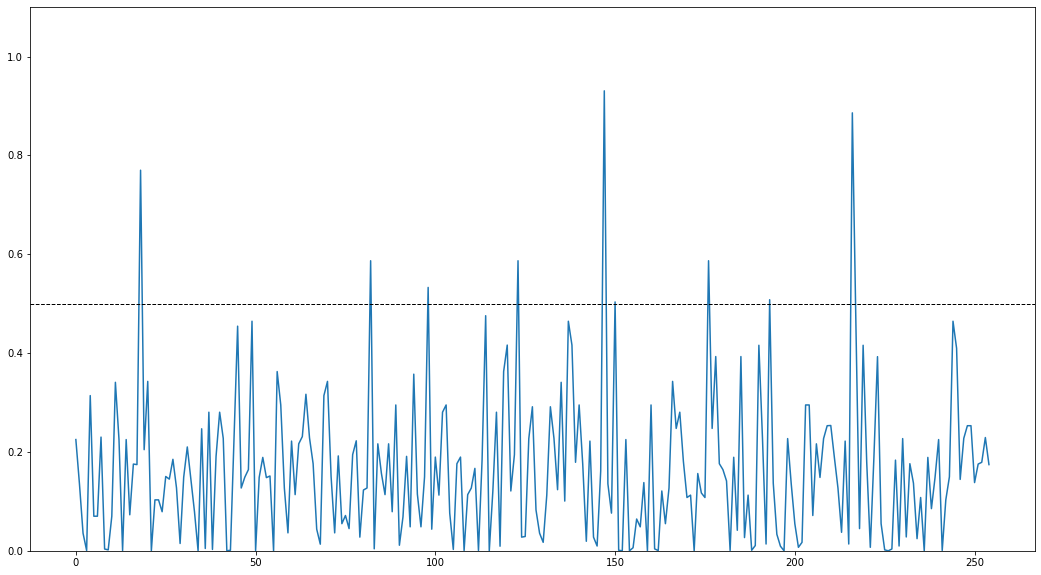

In [1260]:
plt.figure(figsize=(18,10))
plt.plot(y_pred_prob_nn_1[:,1])
plt.axhline(y=0.5, c="black", linestyle="--", linewidth=1)
plt.ylim(0,1.1)
plt.show()

In [1261]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

x_pred_class_nn_1 = model_1.predict_classes(X_train_norm)
x_pred_prob_nn_1 = model_1.predict(X_train_norm)

In [1262]:
# Let's check out the outputs to get a feel for how keras apis work.
x_pred_class_nn_1[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1263]:
x_pred_prob_nn_1[:10]

array([[0.9625773 , 0.0374227 ],
       [0.88296247, 0.11703757],
       [0.7835439 , 0.21645617],
       [0.9938215 , 0.00617852],
       [0.8079903 , 0.19200969],
       [0.79250926, 0.2074908 ],
       [0.95625955, 0.04374048],
       [0.80537856, 0.19462141],
       [0.8789531 , 0.12104689],
       [0.98518384, 0.01481614]], dtype=float32)

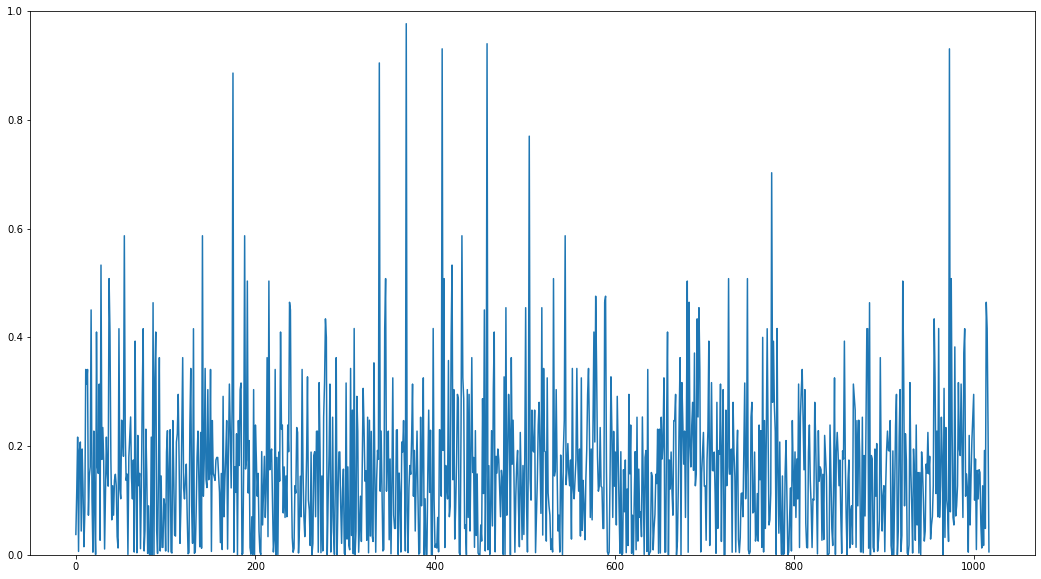

In [1264]:
plt.figure(figsize=(18,10))
plt.plot(x_pred_prob_nn_1[:,1])
plt.ylim(0,1)
plt.show()

In [1265]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

new_pred_class_nn_1 = model_1.predict_classes(x1)
new_pred_prob_nn_1 = model_1.predict(x1)

In [1266]:
new_pred_class_nn_1[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

In [1267]:
new_pred_prob_nn_1[:10]

array([[9.9999058e-01, 9.4300294e-06],
       [9.9987686e-01, 1.2307223e-04],
       [9.9997222e-01, 2.7819538e-05],
       [1.0000000e+00, 9.6486423e-11],
       [6.4648545e-01, 3.5351455e-01],
       [9.9996889e-01, 3.1097286e-05],
       [9.9994850e-01, 5.1474108e-05],
       [9.9997008e-01, 2.9903353e-05],
       [9.9999821e-01, 1.7972383e-06],
       [9.9998975e-01, 1.0233547e-05]], dtype=float32)

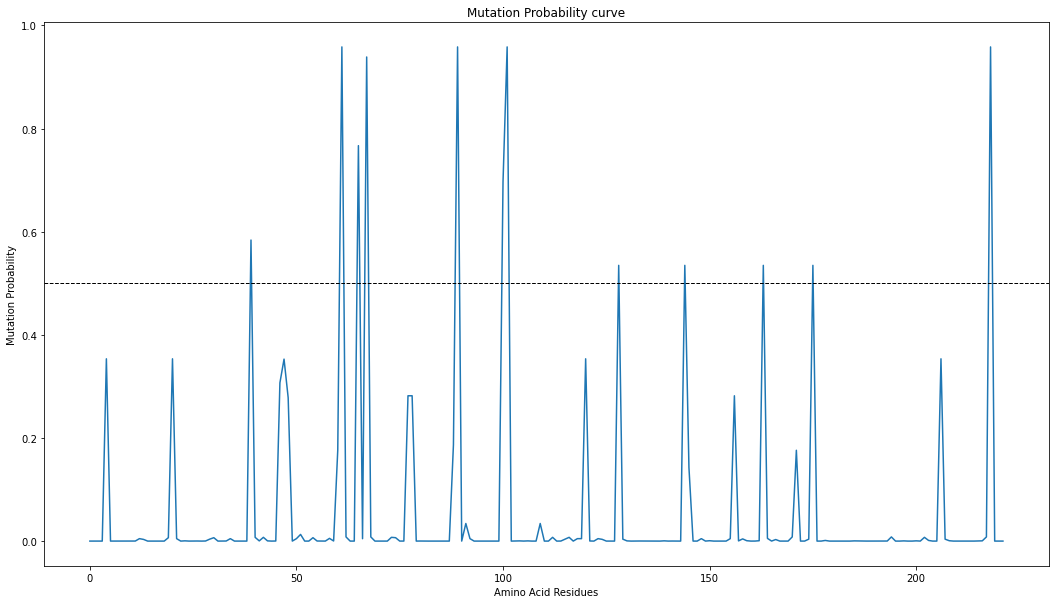

In [1305]:
plt.figure(figsize=(18,10))
plt.plot(new_pred_prob_nn_1[:,1])
plt.axhline(y=0.5, c="black", linestyle="--", linewidth=1)
plt.xlabel("Amino Acid Residues")
plt.ylabel("Mutation Probability")
plt.title("Mutation Probability curve")
#plt.ylim(0,1)
#plt.xlim(210,220)
plt.show()

In [1269]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [1270]:
run_hist_1.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

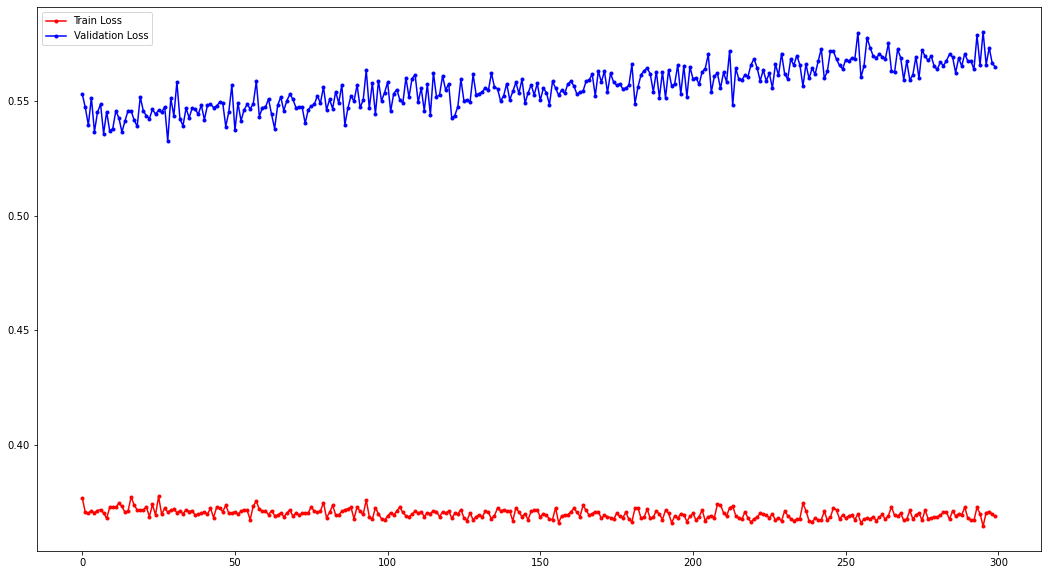

In [1271]:
plt.figure(figsize=(18,10))
plt.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
plt.legend()
plt.show()

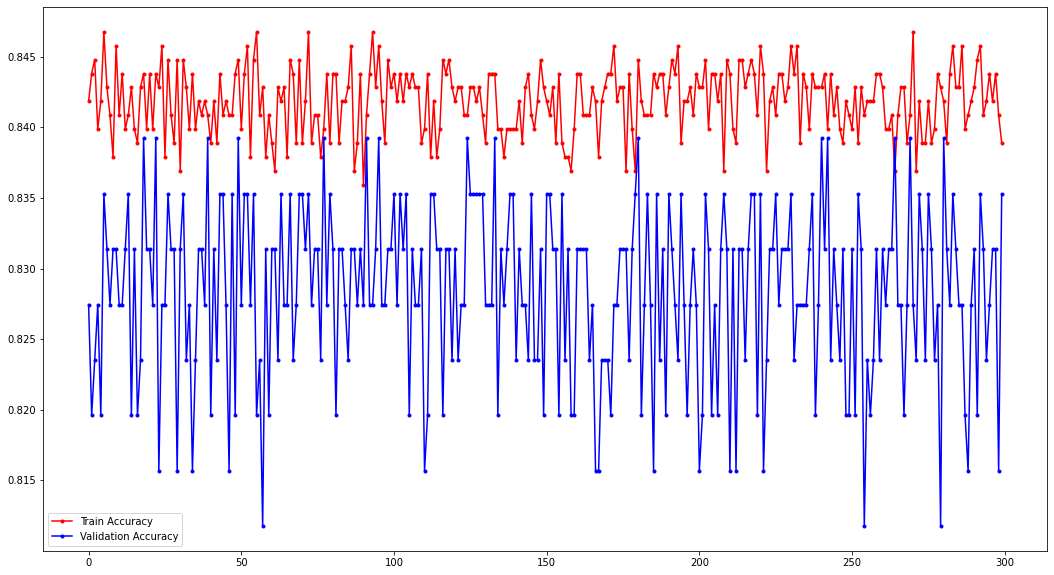

In [1272]:
plt.figure(figsize=(18,10))
plt.plot(run_hist_1.history["acc"],'r', marker='.', label="Train Accuracy")
plt.plot(run_hist_1.history["val_acc"],'b', marker='.', label="Validation Accuracy")
plt.legend()
plt.show()